In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_dominant_colors(image_path, k=5):
    # Load image and convert to RGB
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Reshape image to a 2D array of pixels
    pixels = img_rgb.reshape(-1, 3)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)

    # Get cluster centers (dominant colors)
    colors = kmeans.cluster_centers_.astype(int)

    # Count how many pixels are in each cluster
    _, counts = np.unique(kmeans.labels_, return_counts=True)

    # Sort by dominance
    sorted_idxs = np.argsort(-counts)
    sorted_colors = colors[sorted_idxs]
    sorted_counts = counts[sorted_idxs]

    # Return color info
    return [(tuple(color), count) for color, count in zip(sorted_colors, sorted_counts)]

# Example usage
dominant_colors = get_dominant_colors('2.jpeg', k=5)

for i, (color, count) in enumerate(dominant_colors):
    print(f"{i+1}. Color RGB: {color}, Count: {count}")


1. Color RGB: (59, 57, 63), Count: 20389
2. Color RGB: (173, 109, 78), Count: 11987
3. Color RGB: (82, 66, 64), Count: 9754
4. Color RGB: (123, 88, 72), Count: 6169
5. Color RGB: (230, 143, 47), Count: 2089


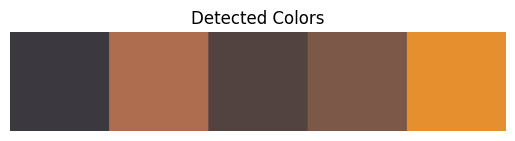

In [2]:
def plot_palette(colors):
    swatch_size = 100
    palette = np.zeros((swatch_size, swatch_size * len(colors), 3), dtype=np.uint8)
    
    for i, (color, _) in enumerate(colors):
        palette[:, i*swatch_size:(i+1)*swatch_size] = color
    
    plt.imshow(palette)
    plt.axis('off')
    plt.title("Detected Colors")
    plt.show()

plot_palette(dominant_colors)


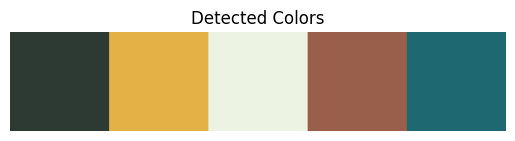

Original Color 1 (RGB): (44, 58, 51)
Original Color 2 (RGB): (227, 177, 70)
Original Color 3 (RGB): (237, 243, 226)
Original Color 4 (RGB): (153, 95, 74)
Original Color 5 (RGB): (30, 104, 113)


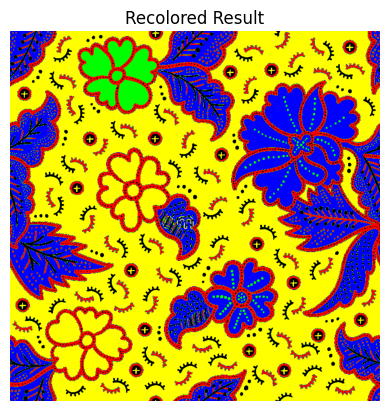

In [5]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_dominant_colors(image, k=5):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = img_rgb.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_
    return colors, labels

def replace_colors(image, colors, labels, color_map):
    pixels = image.reshape(-1, 3)
    output_pixels = pixels.copy()

    for i, color in enumerate(colors):
        mask = (labels == i)
        output_pixels[mask] = color_map[i]

    return output_pixels.reshape(image.shape)

def plot_palette(colors):
    swatch_size = 100
    palette = np.zeros((swatch_size, swatch_size * len(colors), 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        palette[:, i*swatch_size:(i+1)*swatch_size] = color
    plt.imshow(palette)
    plt.axis('off')
    plt.title("Detected Colors")
    plt.show()

# ---- MAIN PIPELINE ----
img = cv2.imread('elegant-floral.webp')

# Step 1: Detect Colors
dominant_colors, labels = get_dominant_colors(img, k=5)
plot_palette(dominant_colors)

# Step 2: Ask user for new colors
new_colors = []
for i, color in enumerate(dominant_colors):
    print(f"Original Color {i+1} (RGB): {tuple(color)}")
    new_r = int(input(f" → New R (0-255): "))
    new_g = int(input(f" → New G (0-255): "))
    new_b = int(input(f" → New B (0-255): "))
    new_colors.append([new_r, new_g, new_b])

# Step 3: Replace colors
new_img = replace_colors(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), dominant_colors, labels, new_colors)

# Step 4: Show and save
cv2.imwrite('recolored_image.jpg', cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR))
plt.imshow(new_img)
plt.axis('off')
plt.title("Recolored Result")
plt.show()
